# 💠 Diamonds in the Rough💠
(Python is Rough)
---



---



# Our Business Problem
The jewelry industry stands as one of the largest sectors globally, rooted in the timeless trade of precious metals and gems. With a market size valued at 340.69 billion USD annually in 2022, it remains a pivotal force in the realms of fashion and high society. Diamonds, constituting approximately 28% of this market, contribute nearly 100 billion dollars annually.

The inherent value of diamonds is intricately tied to their formation process. For billions of years, diamonds undergo immense pressure beneath the Earth's surface before slowly emerging. Due to the rarity of diamonds making it to the surface, their scarcity amplifies their intrinsic value. Only about 50% of the diamonds that do surface are deemed suitable for sale.

Moreover, diamonds have evolved into an emblem of fashion and modern society. Prominent fashion and jewelry corporations have capitalized on the prestige associated with these gems, garnering substantial social attention and, consequently, profits. It's become commonplace to observe celebrities and musicians adorned with diamond-studded accessories, such as iced-out watches.
(See Image Below)

The central challenge at hand pertains to the pricing dynamics of these gems. Across social media platforms, numerous videos depict individuals engaged in relentless negotiations over jewel prices. To address this, we are leveraging a diamond dataset to construct a model capable of predicting diamond prices and recommending optimal selling prices. Through the implementation of this model, we aim to support brokers and jewelers by introducing an algorithm that takes an unbiased and calculated approach to diamond pricing.




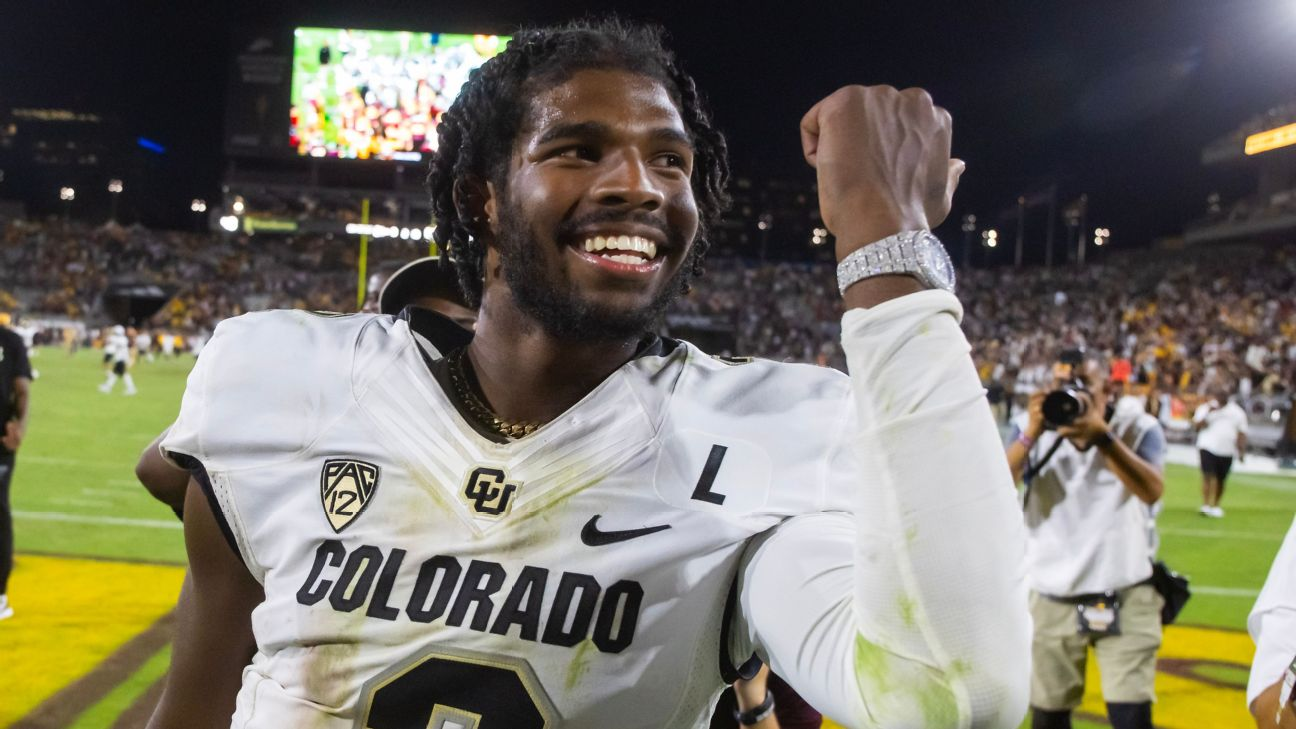

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def import_image(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img.show()
            return img
        else:
            print(f"Failed to download image. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

image_url = 'https://a.espncdn.com/photo/2023/1013/r1237846_1296x729_16-9.jpg'
imported_image = import_image(image_url)
imported_image

**Everyone appreciates a quality diamond!**

# About the Data
https://www.kaggle.com/datasets/shivam2503/diamonds

We found this dataset on Kaggle to create our model. The dataset is a comprehensive list of diamonds with their correspoding data.

- Carat: Which indicates the mass of the diamond. 1 carat = 200mg
- Cut: How well defined the diamond is, ie the shape of it.
- Color: The color of the diamond, D being the best color and J the worst.
- Clarity: This is a measure of purity and clarity in the stone,  in order from flawless to not so flawless, [IF, VVS1, VVS2, VS1, VS2, SI1, S12, I1]
- Depth: Depth expressed as a percentage. | Total percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- Table: Width of the diamond relative to its widest point
- x: lenght mm
- y: width mm
- z: depth mm

The last part of the data is the Price of the diamond. This is going to be our target variable. By training the model on the breadth of other data we have acess to, we will build the model to accurately predict the price of a stone.

In [ ]:
import pandas as pd
data = pd.read_csv('diamonds.csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Exploring the Data

To construct this model, the initial stage involves examining the impact of each category on diamond prices. Given the diverse range of shapes and sizes in these gems, it becomes crucial to analyze the averages within each category. This approach enables us to identify underlying patterns and trends in pricing

In [ ]:
# Import Necessary Packages for Analysis
import pandas as pd
import requests
from collections import OrderedDict
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Read in the Diamonds Data Set.
data = pd.read_csv('diamonds.csv')
df = pd.DataFrame(data)
df = df.rename(columns={
    'Unnamed: 0':'Record ID'
})
df

,Record ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


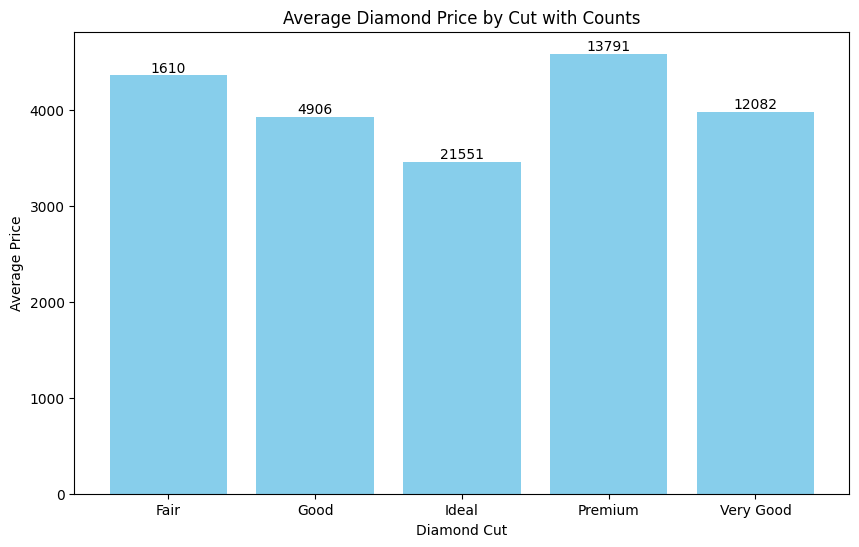

In [ ]:
# Chart to show the average Price based on Cut

average_price_by_cut = df.groupby('cut')['price'].mean().reset_index()
cut_counts = df['cut'].value_counts().reset_index()
cut_counts.columns = ['cut', 'count']
merged_data = pd.merge(average_price_by_cut, cut_counts, on='cut')

#Plotting the Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data['cut'], merged_data['price'], color='skyblue')


for bar, count in zip(bars, merged_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Diamond Cut')
plt.ylabel('Average Price')
plt.title('Average Diamond Price by Cut with Counts')
plt.show()

**This Graph Shows Average Price vs Their Cut**

It also indicates the number of individual diamonds with that specific cut within this dataset.

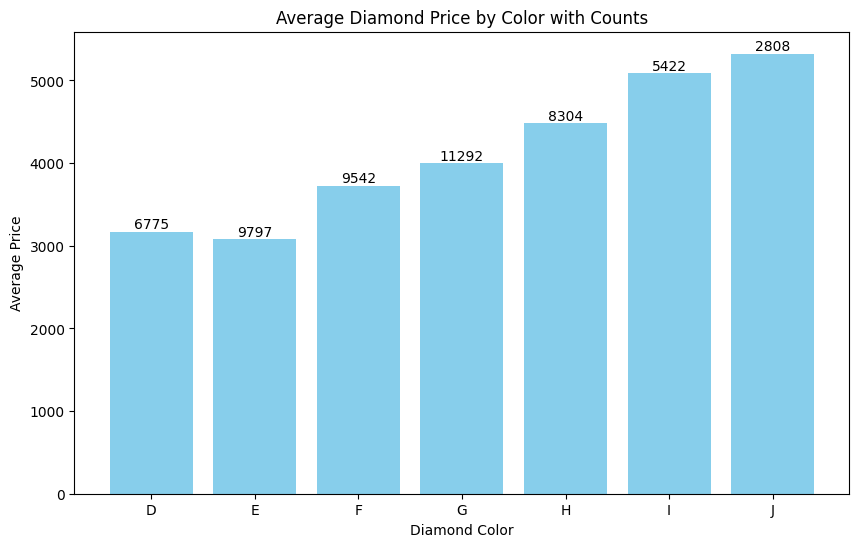

In [ ]:
#Chart to Show Average Price Based on Color

average_price_by_color = df.groupby('color')['price'].mean().reset_index()
color_counts = df['color'].value_counts().reset_index()
color_counts.columns = ['color', 'count']
merged_data = pd.merge(average_price_by_color, color_counts, on='color')

#Plotting the Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data['color'], merged_data['price'], color='skyblue')


for bar, count in zip(bars, merged_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Diamond Color')
plt.ylabel('Average Price')
plt.title('Average Diamond Price by Color with Counts')
plt.show()

**This Graph Displays the Price of the Gem and its Corresponding Color Grade**

More so than the above graph, this presents a very clear correlation between the color grade and price.

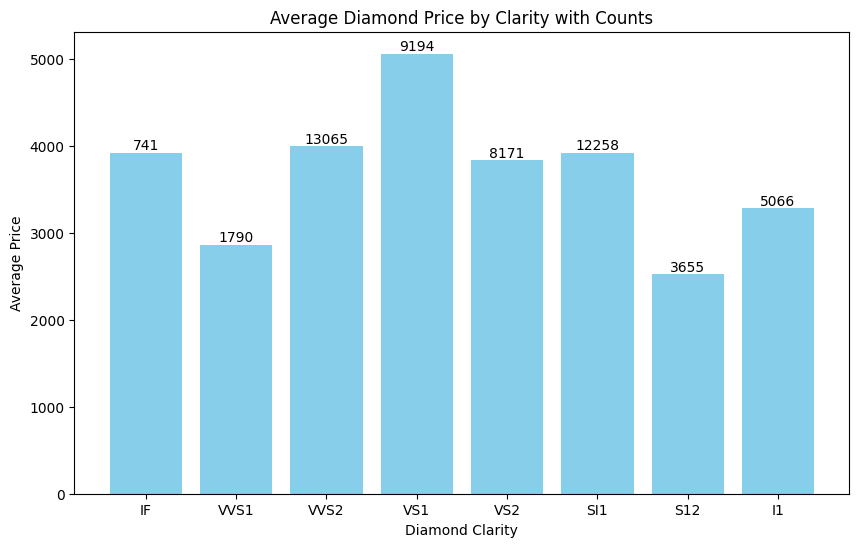

In [ ]:
#Chart to Show Average Price Based on Clarity

average_price_by_clarity = df.groupby('clarity')['price'].mean().reset_index()
clarity_counts = df['clarity'].value_counts().reset_index()
clarity_counts.columns = ['clarity', 'count']
merged_data = pd.merge(average_price_by_clarity, clarity_counts, on='clarity')

category_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'S12', 'I1']

#Plotting the Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(merged_data['clarity'], merged_data['price'], color='skyblue')


for bar, count in zip(bars, merged_data['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(merged_data['clarity'], labels=category_order)
plt.xlabel('Diamond Clarity')
plt.ylabel('Average Price')
plt.title('Average Diamond Price by Clarity with Counts')
plt.show()

**This Graph Shows the Average Price vs the Clarity Grade of the Gem**

In [ ]:
# This is a graph showing the price of a diamond in relation to its carat.

data = pd.read_csv('diamonds.csv')
df = pd.DataFrame(data)

# Create an interactive scatter plot
fig = px.scatter(df, x='carat', y='price', hover_data=['cut', 'color', 'clarity'],
                 labels={'carat': 'Carat', 'price': 'Price'},
                 title='Diamond Price vs Carat')
# Show the plot
fig.show()

**This Interactive Chart Provides a more In-Depth View of Each Individual Gem**

Due to the multitude of factors influencing diamond prices, this chart vividly illustrates the various pricing determinants. For instance, a diamond with a higher carat may exhibit lower clarity and color, resulting in a lower price. Conversely, an expensive diamond might possess suboptimal carat and color but compensates with a flawless cut and clarity. The chart effectively portrays the relationship between price and carat, and upon hovering, reveals the specific characteristics of each gem.

# Making Predictions
From our diamonds dataset we found online, we wanted to use the various information available about each diamond to predict what the price of a diamond will be. After looking at how different values of the features present in the dataset affect the price, we were confident that implementing a K-Nearest Neighbors regression model would provide a great indicator on how to determine the price of a diamond.

In [ ]:
import pandas as pd

#Read in the Diamonds Data Set.
data = pd.read_csv('diamonds.csv')
df = pd.DataFrame(data)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
#Change the ordinal feature cut into a numerical value
print(df['cut'].unique())
value_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

# Map the values in the categorical column to numbers
df['cut'] = df['cut'].map(value_mapping)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [ ]:
# One Hot Encoding for the categorical columns color and clarity
df_encoded = pd.get_dummies(df, columns=['color', 'clarity'], drop_first=True)

#find One-Hot Encoded columns that contain the word color and change their type to int
color_columns = [col for col in df_encoded.columns if 'color' in col.lower()]
df_encoded[color_columns] = df_encoded[color_columns].astype(int)

#find One-Hot Encoded columns that contain the word clarity and change their type to int
color_columns = [col for col in df_encoded.columns if 'clarity' in col.lower()]
df_encoded[color_columns] = df_encoded[color_columns].astype(int)
df_encoded.fillna(0, inplace=True)



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Assuming 'X' contains your features and 'y' contains the target variable
# Split the data into training and testing sets
model_data = df_encoded.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(model_data, df_encoded['price'], test_size=0.2, random_state=42)

# Create a KNN Regressor instance
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

In [ ]:
#Merge the predictions back with the original dataframe to get a full picure of the accuracy of the model in relation to the features included
pd.set_option('display.max_columns', None)

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
merged_df = df_encoded.merge(df_pred, left_index=True, right_index=True)

merged_df.head(5)

,carat,cut,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,Actual,Predicted
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,1,0,0,1,0,0,0,0,335,490.4
6,0.24,3,62.3,57.0,336,3.95,3.98,2.47,0,0,0,0,1,0,0,0,0,0,0,1,0,336,667.8
7,0.26,3,61.9,55.0,337,4.07,4.11,2.53,0,0,0,1,0,0,0,1,0,0,0,0,0,337,460.6
31,0.23,3,59.8,57.0,402,4.04,4.06,2.42,0,1,0,0,0,0,0,0,0,1,0,0,0,402,445.8
34,0.23,3,61.9,58.0,402,3.92,3.96,2.44,0,0,0,0,0,0,0,0,0,1,0,0,0,402,460.4


In [ ]:
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.2f}')

R-squared: 0.94


**Understanding the model performance:**

R-Squared represents how well the models predictions explain the variance in the data. It is on a range of [0 - 1], and the higher the value means the greater prediction capabilities of the model. Our model received an R-squared score of 0.94, which suggests that approximately 94% of the variablity in our target variable price can be explained by our model. This is generally considered a high R-squared score and means that our model does a good job at predicting the price of diamond.

# Business Value
**How does a model like this provide value to a business or a customer?**

Our belief is that this model can be used by both consumers and diamond retailers. In a scenario where you are a consumer and are looking to buy a diamond from a business, it is essential to ensure that you are getting a good deal on the diamond you are purchasing. By having a model that can give you an accurate estimate of the price of your diamond, you can have a quantifiable benchmark that you can use during negotiations. This way, customers can make sure they are getting the best possible price for the diamond that they are buying. Additionally, the same value exists for diamond retailers. Having a model that estimates the price of their diamond makes it more efficient for the business to price their diamonds and makes their pricing strategy more accurate and effective.

In the code below we implemented a friendly user interface where users can input the specifications of the diamond they are looking to buy/sell and get the estimated price of that particular diamond.

In [ ]:
#Find the max and min values for each feature so we can be able to scale them on the UI
max_values = df.max(axis=0)
min_values = df.min(axis=0)

# Print the results
print("Max Values:")
print(max_values)

print("\nMin Values:")
print(min_values)

Max Values:
carat       5.01
cut            5
color          J
clarity     VVS2
depth       79.0
table       95.0
price      18823
x          10.74
y           58.9
z           31.8
dtype: object

Min Values:
carat       0.2
cut           1
color         D
clarity      I1
depth      43.0
table      43.0
price       326
x           0.0
y           0.0
z           0.0
dtype: object


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

# Assuming you have a model named knn_regressor
# Replace the model with your actual model

# ... (your model and imports)

# Create interactive sliders for user input
carat_slider = widgets.FloatSlider(value=1, min=0.1, max=3.0, step=0.01, description='Carat:')
depth_slider = widgets.FloatSlider(value=60.0, min=30.0, max=90.0, step=1.0, description='Depth %:')
table_slider = widgets.FloatSlider(value=60.0, min=30.0, max=90.0, step=1.0, description='Table:')
cut_slider = widgets.FloatSlider(value=3, min=1.0, max=5.0, step=1.0, description='Cut:')
x_slider = widgets.FloatSlider(value=5.0, min=0.0, max=10.0, step=0.1, description='Length:')
y_slider = widgets.FloatSlider(value=5.0, min=0.0, max=10.0, step=0.1, description='Width:')
z_slider = widgets.FloatSlider(value=5.0, min=0.0, max=7.0, step=0.1, description='Depth:')

colors = ['E', 'F', 'G', 'H', 'I', 'J']
box_c = widgets.Dropdown(options=colors, value='E', description='Color:')

clarity = ['IF', 'SI1', 'SI2', 'VS1', 'VS2', 'WS1', 'WS2']
box_cl = widgets.Dropdown(options=clarity, value='IF', description='Clarity:')

# Create the Predict button
button = widgets.Button(description="Predict")


def on_button_clicked(b):
    with out:
        l = [carat_slider.value, cut_slider.value, depth_slider.value, table_slider.value,
             x_slider.value, y_slider.value, z_slider.value, box_c.value, box_cl.value]
        prediction = predict_price(*l)

button.on_click(on_button_clicked)

def predict_price(carat, cut, depth, table, x, y, z, color, clarity):
    l = [carat, cut, depth, table, x, y, z]

    if color == 'E':
      l.append(1)
    else:
      l.append(0)
    if color == 'F':
      l.append(1)
    else:
      l.append(0)
    if color == 'G':
      l.append(1)
    else:
      l.append(0)
    if color == 'H':
      l.append(1)
    else:
      l.append(0)
    if color == 'I':
      l.append(1)
    else:
      l.append(0)
    if color == 'J':
      l.append(1)
    else:
      l.append(0)

    if clarity == 'IF':
      l.append(1)
    else:
      l.append(0)
    if clarity == 'SI1':
      l.append(1)
    else:
      l.append(0)
    if clarity == 'SI2':
      l.append(1)
    else:
      l.append(0)
    if clarity == 'VS1':
      l.append(1)
    else:
      l.append(0)
    if clarity == 'VS2':
      l.append(1)
    else:
      l.append(0)
    if clarity == 'WS1':
      l.append(1)
    else:
      l.append(0)
    if clarity == 'WS2':
      l.append(1)
    else:
      l.append(0)

    prediction = knn_regressor.predict([l])
    print(f"Estimated Price: {prediction[0]:.2f}")



out = widgets.Output(layout={'border': '4px solid limegreen'})


# Arrange the widgets in a VBox layout
input_widgets = [carat_slider, depth_slider, table_slider, cut_slider, x_slider, y_slider, z_slider, box_c, box_cl]
ui_layout = widgets.VBox(input_widgets + [button, out])

# Display the UI
display(ui_layout)


# Conclusion
Our project revolved aroud taking data from an outside industry and examining it to create a practical business application. After looking at a multitude of problems we landed on the gem industry.

To support it, we've developed an interface enabling users to input gem statistics and receive a fair market price. This tool serves various stakeholders, including independent brokers and large corporations, offering transparency and efficiency in determining the value of highly sought-after gems.

Our process began by analyzing factors influencing the diamond market and gem preferences. Subsequently, we examined our dataset, identifying pricing patterns and enhancing our understanding of the data structure. Leveraging KNN regression, we trained a model on diamond pricing, achieving an impressive R-squared of 94, showcasing the algorithm's effectiveness in predicting gem prices.

Taking it a step further, we designed a user-friendly interface for calculating and delivering fair gem prices based on user-input parameters. This isn't merely theoretical; it's a practical business application. Feel free to interact with the slider and check prices!

Our project revolves around transforming real-world data into a valuable business tool using the capabilities of the Python language. Thank you!

#Made By: Alex Reid and Gerritt Pekkala